In [41]:
# Import the libraries for the EDA -- skimpy to clean, visualize
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
from rich import print
from skimpy import clean_columns

In [42]:
# Set max rows displayed for readability
pd.set_option("display.max_rows", 10)
warnings.filterwarnings('ignore')

In [43]:
# Load initial datasets
df_values = pd.read_csv(
    "train_values.csv",
)
df_labels = pd.read_csv(
    "train_labels.csv",
)
df_values.head()
df_labels.head()

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3


In [44]:
# combine the labels and values dataframes to form a final training dataset
training_dataset = pd.merge(df_values, df_labels, on='building_id')
training_dataset.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,3


In [56]:
# removing building_id from model, given it's an identity column and has no statistical significance
training_dataset.drop(['building_id'], axis=1, inplace=True)

In [46]:
#checking the metadata, null values and datatypes of each variable
training_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 0 to 260600
Data columns (total 37 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   count_floors_pre_eq                     260601 non-null  int64 
 2   age                                     260601 non-null  int64 
 3   area_percentage                         260601 non-null  int64 
 4   height_percentage                       260601 non-null  int64 
 5   land_surface_condition                  260601 non-null  object
 6   foundation_type                         260601 non-null  object
 7   roof_type                               260601 non-null  object
 8   ground_floor_type                       260601 non-null  object
 9   other_floor_type                        260601 non-null  object
 10  position                                260601 non-null 

In [47]:
# converting the object datatypes to relevant categorical datatypes for modeling
training_dataset = training_dataset.assign(
    land_surface_condition=df["land_surface_condition"].astype("category"),
    foundation_type=df["foundation_type"].astype("category"),
    roof_type=df["roof_type"].astype("category"),
    ground_floor_type=df["ground_floor_type"].astype("category"),
    other_floor_type=df["other_floor_type"].astype("category"),
    position=df["position"].astype("category"),
    plan_configuration=df["plan_configuration"].astype("category"),
    legal_ownership_status=df["legal_ownership_status"].astype("category"),
)
training_dataset.head()

,building_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,2,30,6,5,t,r,n,f,q,...,0,0,0,0,0,0,0,0,0,3
1,28830,2,10,8,7,o,r,n,x,q,...,0,0,0,0,0,0,0,0,0,2
2,94947,2,10,5,5,t,r,n,f,x,...,0,0,0,0,0,0,0,0,0,3
3,590882,2,10,6,5,t,r,n,f,x,...,0,0,0,0,0,0,0,0,0,2
4,201944,3,30,8,9,t,r,n,f,x,...,0,0,0,0,0,0,0,0,0,3


In [48]:
# Summarize the data to see outliers and patterns
training_dataset.describe()

,building_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
count,2.606010e+05,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,...,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
mean,5.256755e+05,2.129723,26.535029,8.018051,5.434365,0.088645,0.761935,0.034332,0.018235,0.068154,...,0.033626,0.008101,0.000940,0.000361,0.001071,0.000188,0.000146,0.000088,0.005119,2.238272
std,3.045450e+05,0.727665,73.565937,4.392231,1.918418,0.284231,0.425900,0.182081,0.133800,0.252010,...,0.180265,0.089638,0.030647,0.018989,0.032703,0.013711,0.012075,0.009394,0.071364,0.611814
min,4.000000e+00,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.611900e+05,2.000000,10.000000,5.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,5.257570e+05,2.000000,15.000000,7.000000,5.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,7.897620e+05,2.000000,30.000000,9.000000,6.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,1.052934e+06,9.000000,995.000000,100.000000,32.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


In [49]:
# Summarize the data to see outliers and patterns
skim(training_dataset)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                Categories                                       │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓ ┏━━━━━━━━━━━━━━━━━━━━━━━━┓                               │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃ ┃ Categorical Variables  ┃                               │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩ ┡━━━━━━━━━━━━━━━━━━━━━━━━┩                               │
│ │ Number of rows    │ 260601 │ │ int64       │ 29    │ │ land_surface_condition │                               │
│ │ Number of columns │ 37     │ │ category    │ 8     │ │ foundation_type        │                               │
│ └───────────────────┴────────┘ └─────────────┴───────┘ │ roof_type              │                               │
│                                                        │ ground_floor_type      │                               │
│                                                        │ other_floor_type       │                               │
│                                                        │ position               │                               │
│                                                        │ plan_configuration     │                               │
│                                                        │ legal_ownership_status │                               │
│                                                        └────────────────────────┘                               │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━┳━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name              ┃ NA  ┃ NA %  ┃ mean      ┃ sd      ┃ p0  ┃ p25     ┃ p75     ┃ p100     ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━╇━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━┩  │
│ │ building_id              │   0 │     0 │    530000 │  300000 │   4 │  260000 │  790000 │  1100000 │ ██████ │  │
│ │ count_floors_pre_eq      │   0 │     0 │       2.1 │    0.73 │   1 │       2 │       2 │        9 │   █▂   │  │
│ │ age                      │   0 │     0 │        27 │      74 │   0 │      10 │      30 │     1000 │   █    │  │
│ │ area_percentage          │   0 │     0 │         8 │     4.4 │   1 │       5 │       9 │      100 │   █    │  │
│ │ height_percentage        │   0 │     0 │       5.4 │     1.9 │   2 │       4 │       6 │       32 │   █▂   │  │
│ │ has_superstructure_a     │   0 │     0 │     0.089 │    0.28 │   0 │       0 │       0 │        1 │ █    ▁ │  │
│ │ has_superstructure_m     │   0 │     0 │      0.76 │    0.43 │   0 │       1 │       1 │        1 │ ▂    █ │  │
│ │ has_superstructure_s     │   0 │     0 │     0.034 │    0.18 │   0 │       0 │       0 │        1 │   █    │  │
│ │ has_superstructure_c     │   0 │     0 │     0.018 │    0.13 │   0 │       0 │       0 │        1 │   █    │  │
│ │ has_superstructure_m     │   0 │     0 │     0.068 │    0.25 │   0 │       0 │       0 │        1 │ █    ▁ │  │
│ │ has_superstructure_c     │   0 │     0 │     0.075 │    0.26 │   0 │       0 │       0 │        1 │ █    ▁ │  │
│ │ has_superstructure_t     │   0 │     0 │      0.25 │    0.44 │   0 │       0 │       1 │        1 │ █    ▃ │  │
│ │ has_superstructure_b     │   0 │     0 │     0.085 │    0.28 │   0 │       0 │       0 │        1 │ █    ▁ │  │
│ │ has_superstructure_r     │   0 │     0 │     0.043 │     0.2 │   0 │       0 │       0 │        1 │   █    │  │
│ │ has_superstructure_r     │   0 │     0 │     0.016 │    0.12 │   0 │       0 │       0 │        1 │   █    │  │
│ │ has_superstructure_o     │   0 │     0 │     0.015 │    0.12 │   0 │       0 │       0 │        1 │   █    │  │
│ │ count_families           │   0 │     0 │      0.98 │

In [50]:
import seaborn as sns

def categorical_summarized(dataframe, x=None, y=None, hue=None, palette='Set1', verbose=True):
    '''
    Helper function that gives a quick summary of a given column of categorical data
    Arguments
    =========
    dataframe: pandas dataframe
    x: str. horizontal axis to plot the labels of categorical data, y would be the count
    y: str. vertical axis to plot the labels of categorical data, x would be the count
    hue: str. if you want to compare it another variable (usually the target variable)
    palette: array-like. Colour of the plot
    Returns
    =======
    Quick Stats of the data and also the count plot
    '''
    if x == None:
        column_interested = y
    else:
        column_interested = x
    series = dataframe[column_interested]
    print(series.describe())
    print('mode: ', series.mode())
    if verbose:
        print('='*80)
        print(series.value_counts())

    sns.countplot(x=x, y=y, hue=hue, data=dataframe, palette=palette)
    plt.show()

count     260601
unique         3
top            n
freq      182842
Name: roof_type, dtype: object

mode:  0    n
Name: roof_type, dtype: category
Categories (3, object): ['n', 'q', 'x']

================================================================================

n    182842
q     61576
x     16183
Name: roof_type, dtype: int64

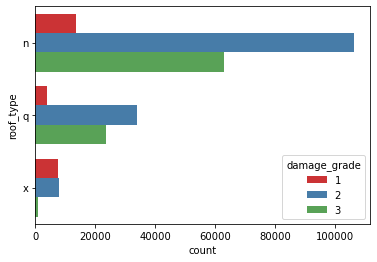

In [60]:
# Bivariate analysis with roof_type - Target variable: Damage_grade
categorical_summarized(training_dataset, y = 'roof_type', hue='damage_grade')

count    260601.000000
mean          2.129723
std           0.727665
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           9.000000
Name: count_floors_pre_eq, dtype: float64

mode:  0    2
Name: count_floors_pre_eq, dtype: int64

================================================================================

2    156623
3     55617
1     40441
4      5424
5      2246
6       209
7        39
8         1
9         1
Name: count_floors_pre_eq, dtype: int64

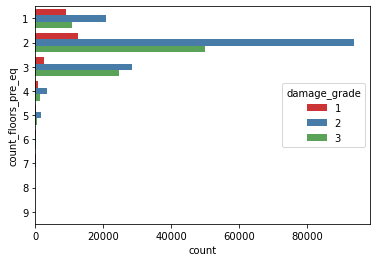

In [58]:
# Bivariate analysis with number of floors - Target variable: Damage_grade
categorical_summarized(training_dataset, y = 'count_floors_pre_eq', hue='damage_grade')

count     260601
unique         5
top            r
freq      219196
Name: foundation_type, dtype: object

mode:  0    r
Name: foundation_type, dtype: category
Categories (5, object): ['h', 'i', 'r', 'u', 'w']

================================================================================

r    219196
w     15118
u     14260
i     10579
h      1448
Name: foundation_type, dtype: int64

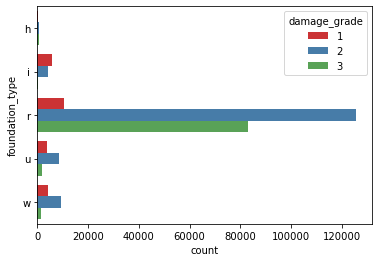

In [59]:
#Bivariate analysis with foundation type on target variable - damage
categorical_summarized(training_dataset, y = 'foundation_type', hue='damage_grade')

count     260601
unique         3
top            t
freq      216757
Name: land_surface_condition, dtype: object

mode:  0    t
Name: land_surface_condition, dtype: category
Categories (3, object): ['n', 'o', 't']

================================================================================

t    216757
n     35528
o      8316
Name: land_surface_condition, dtype: int64

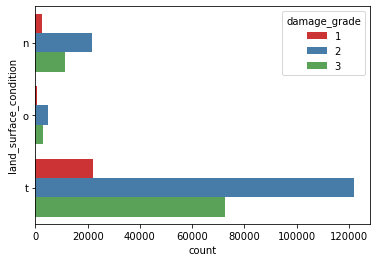

In [61]:
categorical_summarized(training_dataset, y = 'land_surface_condition', hue='damage_grade')

count    260601.000000
mean          0.111880
std           0.315219
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: has_secondary_use, dtype: float64

mode:  0    0
Name: has_secondary_use, dtype: int64

================================================================================

0    231445
1     29156
Name: has_secondary_use, dtype: int64

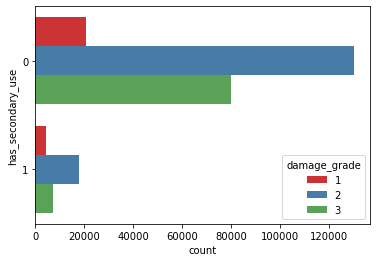

In [62]:
categorical_summarized(training_dataset, y = 'has_secondary_use', hue='damage_grade')

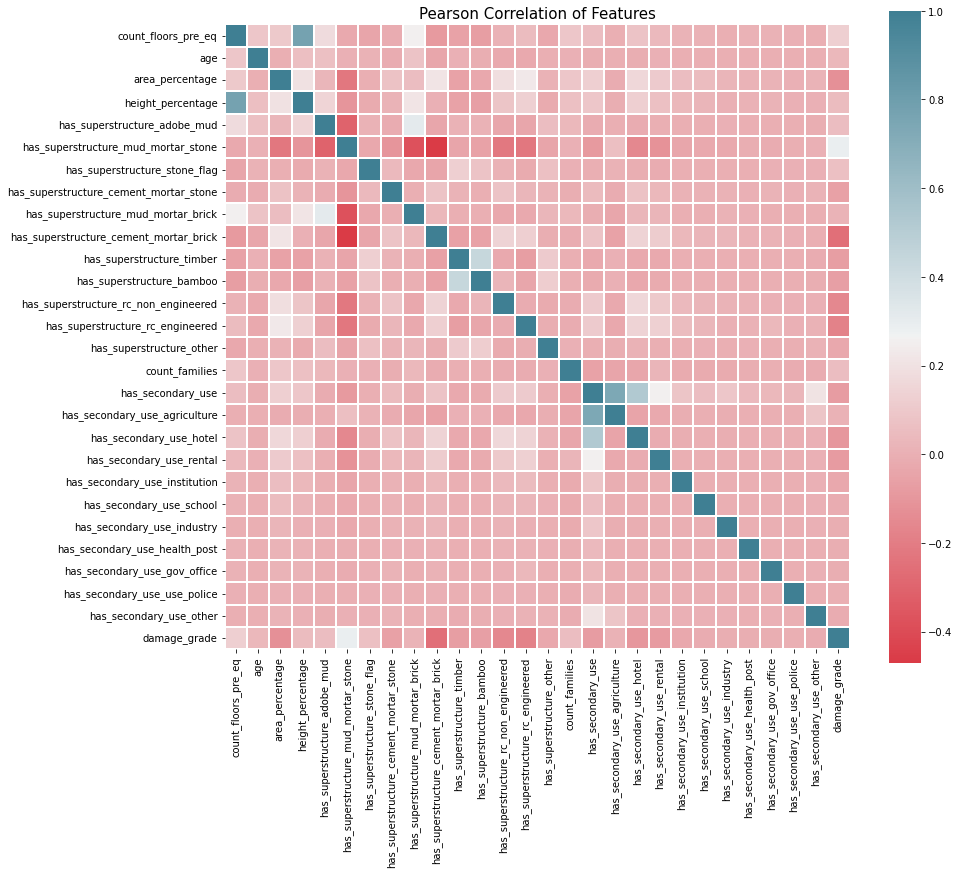

In [70]:
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', size = 15)
colormap = sns.diverging_palette(10, 220, as_cmap = True)
sns.heatmap(training_dataset.corr(),
            cmap = colormap,
            square = True,
            annot = False,
            linewidths=0.1,vmax=1.0, linecolor='white',
            annot_kws={'fontsize':12 })
plt.show()